<a href="https://colab.research.google.com/github/TetianaPavliuk/python_project/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/FinalProjectPython

Mounted at /content/drive
/content/drive/MyDrive/FinalProjectPython


In [3]:
df_events = pd.read_csv("events.csv")
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [4]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [5]:
print(df_events.shape)

(1330, 10)


In [6]:
print(df_events.dtypes)

Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


Маємо DataFrema df_event про продажі компанії за певний період, який складається із 10 колонок та 1330 рядків.
*   Order ID  - унікальний номер запомлення;
*  Order Date - дата формування замовлення;
*  Ship Date - дата відвантаження;
*  Order Priority - пріорітет замовлення;
*  Country Code - код країни;
*   Product ID  - унікальний ідентифікатор товару;
*   Sales Channel - канал продажу;
*   Units Sold -кількість проданих одиниць;
*   Unit Price - ціна за одиницю товару;
*   Unit Cost - витрати на одиницю товару;

In [7]:
df_products = pd.read_csv("products.csv")
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [8]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


DataFrema df_products, складається із двох колонок
*   id - унікальний ідентифікатор товару;
*   item_type - тип категорії, до якої відносяться дані товари;

та 12 рядків, тобто компанія здійснює продажі за 12 категоріями товарів.
Дана таблиця немає пропусків чи аномальних значень,
тип даних вірний.



In [9]:
df_countries = pd.read_csv("countries.csv")
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [10]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [11]:
print(df_countries.shape)

(249, 5)


In [12]:
print(df_countries.dtypes)

name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


DataFrame df_countries містить у собі інформацію про країни, їх коди, та географічне положення. Складається DF із 249 рядків та 5 колонок:
*   name  - назва країни
*   alpha-2 - двохзначний код
*   alpha-3 - трьохзначний код
*   region - континент
*   sub-region - частина континенту(Пн,Пд, ЗХ,Сх)





Для того щоб обєднати всі три DataFrame:
*   df_events  та df_product за стовпцем "Product ID" та "ID" відповідно;
*    df_events та  df_countries за стовпцем "Country Code" та "alpha-3" відповідно.



#Data cleaning

**Таблиця "df_events"**

---



In [13]:
df_events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [14]:
print(df_events.isna().sum())

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [15]:
proportion_missing_values = df_events.isna().sum()/df_events.shape[0]
print(proportion_missing_values)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.061654
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.001504
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Оскільки, доля пропущених значень у колонці Units Sold  невелика (0.001504), можна видалити ці рядки вз датафрейму.
У Колонці Country Code пропущені значення свідчать, про те, що ми не знаємо з якої країни були здійснені ці покупки. Доля пропусків цих значень більша, тому щоб не втратити ці данні, замінимо країну на "Оther"

In [16]:
df_events['Country Code' ]=df_events['Country Code' ].fillna("Other") # замінили пропуски в колонці коду країни

In [17]:
missing_indices = df_events[df_events['Units Sold'].isna()].index[:2]
df_events = df_events.drop(missing_indices)
print(df_events)

       Order ID Order Date   Ship Date Order Priority Country Code  \
0     100640618  10/8/2014  10/18/2014              M          NOR   
1     100983083  8/11/2016   8/11/2016              C          SRB   
2     101025998  7/18/2014   8/11/2014              M        Other   
3     102230632  5/13/2017   6/13/2017              L          MNE   
4     103435266  8/11/2012   9/18/2012              H          SRB   
...         ...        ...         ...            ...          ...   
1325  994504153  1/10/2017   1/13/2017              M          SWE   
1326  994978797  12/5/2014    1/2/2015              H          ITA   
1327  996754205  9/20/2010   9/22/2010              L          RUS   
1328  998043382  6/15/2010    7/3/2010              H          MLT   
1329  999879729  3/31/2012    5/6/2012              M          ALB   

      Product ID Sales Channel  Units Sold  Unit Price  Unit Cost  
0           2103        Online       650.0      205.70     117.11  
1           2103       

In [18]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1328 non-null   int64  
 1   Order Date      1328 non-null   object 
 2   Ship Date       1328 non-null   object 
 3   Order Priority  1328 non-null   object 
 4   Country Code    1328 non-null   object 
 5   Product ID      1328 non-null   int64  
 6   Sales Channel   1328 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1328 non-null   float64
 9   Unit Cost       1328 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 114.1+ KB


In [19]:
df_events['Order Date'] = pd.to_datetime(df_events['Order Date'], errors='coerce')
df_events['Ship Date'] = pd.to_datetime(df_events['Ship Date'], errors='coerce') #перетворення на форомат дати

In [20]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB


In [21]:
print(df_events.isna().sum()) #провіримо чи немає пропусків, чи все відпрацювало коректно

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


In [22]:
df_events.duplicated().sum() # перевірка на наявність дублікатів

np.int64(0)

**Таблиця "df_products"**

---



In [23]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [24]:
df_products = df_products.rename(columns={'id':'Product ID'})# перейменуємо колонку для об'єднання

In [25]:
print(df_products.isna().sum())

Product ID    0
item_type     0
dtype: int64


In [26]:
df_products.head()

,Product ID,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


У таблиці 'df_products' всі дані розпізнаються коректно аномалій не виявлено

**Таблиця "df_countries "**

---



In [27]:
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [28]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [29]:
print(df_countries.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


Оскільки у таблиці 'df_cleaned_events' є колонка із трьохзначним кодом країни, то ми можемо видалити колонку 'alpha-2' із df_countries, та видалити рядок у якому є пропуски у колонці region та sub-region.

In [30]:
df_countries=df_countries.dropna()

In [31]:
df_countries.isna().sum()

,0
name,0
alpha-2,0
alpha-3,0
region,0
sub-region,0


In [32]:
df_countries=df_countries.drop(columns=['alpha-2'])

In [33]:
df_countries = df_countries.rename(columns={'alpha-3':'Country Code'})# перейменуємо колонку для об'єднання

In [34]:
new_row = {'name':'Other', 'Country Code': 'Other', 'region': 'Other', 'sub-region': 'Other'}
df_countries.loc[len(df_countries)] = new_row# додамо рядок для ідентифікації тих країн які нам невідомі, але у них були продажі

In [35]:
df_countries.head()

,name,Country Code,region,sub-region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [36]:
df_countries.duplicated().sum()

np.int64(0)

#Data analysis and visualization

## З’єднання трьох таблиць в один датафрейм:

In [37]:
df_basic = df_events.merge(df_products, on='Product ID').merge(df_countries, on='Country Code')

In [38]:
df_basic.head() #проведемо додаткову перевірку даних, після об'єднання даних

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Other,7940,Online,4693.0,668.27,502.54,Household,Other,Other,Other
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [39]:
df_basic.columns = df_basic.columns.str.lower().str.replace(" ", "_")#перневедемо назви колонок у snake_case

In [40]:
df_basic.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,name,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Other,7940,Online,4693.0,668.27,502.54,Household,Other,Other,Other
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [41]:
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1328 non-null   int64         
 1   order_date      1328 non-null   datetime64[ns]
 2   ship_date       1328 non-null   datetime64[ns]
 3   order_priority  1328 non-null   object        
 4   country_code    1328 non-null   object        
 5   product_id      1328 non-null   int64         
 6   sales_channel   1328 non-null   object        
 7   units_sold      1328 non-null   float64       
 8   unit_price      1328 non-null   float64       
 9   unit_cost       1328 non-null   float64       
 10  item_type       1328 non-null   object        
 11  name            1328 non-null   object        
 12  region          1328 non-null   object        
 13  sub-region      1328 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(7)
me

In [42]:
df_basic = df_basic.rename(columns={'sub-region':'sub_region'})

In [43]:
df_basic = df_basic.rename(columns={'name':'country'})

In [44]:
print(df_basic[['units_sold', 'unit_price', 'unit_cost']].describe())# оцінка числових даних

        units_sold   unit_price    unit_cost
count  1328.000000  1328.000000  1328.000000
mean   4952.201807   264.913245   187.211521
std    2905.198996   217.386320   176.187801
min       2.000000     9.330000     6.920000
25%    2356.750000    81.730000    35.840000
50%    4962.000000   154.060000    97.440000
75%    7459.500000   437.200000   263.330000
max    9999.000000   668.270000   524.960000


In [45]:
df_basic.duplicated().sum()

np.int64(0)

df_basic немає аномальних значень, дублікатів чи пропусків, всі дані розпізнаються коректо.

##Ключові метрики діяльності підприємства:

In [46]:
df_basic.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,country,region,sub_region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Other,7940,Online,4693.0,668.27,502.54,Household,Other,Other,Other
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


In [47]:
total_revenue = df_basic['units_sold']*df_basic['unit_price']
print(f"Total revenue:{total_revenue.sum()}")

Total revenue:1702129408.21


Маємо досить великий Total Revenue (1702129408.21$), що вказує на досить значні обсяги прожажів.Однак. високий рівень доходу не означає високу прибутковість.

In [48]:
total_cost = df_basic['units_sold']*df_basic['unit_cost']
print(f"Total cost:{total_cost.sum()}")

Total cost:1200694949.21


In [49]:
total_profit=total_revenue-total_cost
print(f"Total profit:{total_profit.sum()}")

Total profit:501434459.0


In [50]:
profitability=(total_profit.sum()/total_revenue.sum())*100
print(f"Profitability:{profitability}%")

Profitability:29.45924420207982%


Рівень рентабельності 29,46% є досить хорошим показником для компанії, це 0,30 $ прибутку з кожного заробленого долара.

In [51]:
persent_cost_revenue=(total_cost.sum()/total_revenue.sum())*100
print(f"Persetn cost/revenue:{persent_cost_revenue}%")

Persetn cost/revenue:70.54075579792017%


Значну частину від загального доходу становлять витрати ( 70,54%), це сідчить про те що витрачається дуже багато ресурсів для досягнення таких обсягів продажу.

In [52]:
total_count_orders=df_basic['order_id'].count()
print(f"Total count orders:{total_count_orders}")

Total count orders:1328


In [53]:
total_units_sold=df_basic['units_sold'].sum()
print(f"Total units sold:{total_units_sold}")

Total units sold:6576524.0


In [54]:
countries_covered=df_basic['country'].nunique()
print(f"Count countries covered:{countries_covered}")

Count countries covered:46


In [55]:
region_covered=df_basic['region'].unique()
print(f"Regions covered :{region_covered}")

Regions covered :['Europe' 'Other' 'Asia']


##Аналіз продажів:
в розрізі: **категорій товару**

In [56]:
sales_by_category=df_basic.groupby('item_type')['units_sold'].sum().sort_values(ascending=False)
print(sales_by_category)

item_type
Office Supplies    617641.0
Beverages          613133.0
Fruits             591672.0
Clothes            591385.0
Vegetables         582544.0
Baby Food          562706.0
Personal Care      557678.0
Cosmetics          533291.0
Meat               530380.0
Snacks             490160.0
Cereal             465685.0
Household          440249.0
Name: units_sold, dtype: float64


In [57]:
revenue_by_category = (df_basic.assign(revenue=df_basic['units_sold'] * df_basic['unit_price']).groupby('item_type')['revenue'] .sum().sort_values(ascending=False))
print(revenue_by_category)

item_type
Office Supplies    4.022140e+08
Household          2.942052e+08
Cosmetics          2.331548e+08
Meat               2.237620e+08
Baby Food          1.436476e+08
Cereal             9.579140e+07
Vegetables         8.974673e+07
Snacks             7.478861e+07
Clothes            6.462655e+07
Personal Care      4.557902e+07
Beverages          2.909316e+07
Fruits             5.520300e+06
Name: revenue, dtype: float64


In [58]:
cost_by_category = (df_basic.assign(cost=df_basic['units_sold'] * df_basic['unit_cost']).groupby('item_type')['cost'] .sum().sort_values(ascending=False))
print(cost_by_category)

item_type
Office Supplies    3.242368e+08
Household          2.212427e+08
Meat               1.934243e+08
Cosmetics          1.404315e+08
Baby Food          8.970659e+07
Cereal             5.453637e+07
Vegetables         5.297073e+07
Snacks             4.776119e+07
Personal Care      3.160361e+07
Clothes            2.119524e+07
Beverages          1.949150e+07
Fruits             4.094370e+06
Name: cost, dtype: float64


In [59]:
profit_by_category=(revenue_by_category-cost_by_category).sort_values(ascending=False)
print(profit_by_category)

item_type
Cosmetics          92723306.17
Office Supplies    77977176.25
Household          72962466.77
Baby Food          53940997.16
Clothes            43431314.40
Cereal             41255034.15
Vegetables         36776002.72
Meat               30337736.00
Snacks             27027422.40
Personal Care      13975410.68
Beverages           9601662.78
Fruits              1425929.52
dtype: float64


In [60]:
profitability_by_profit=(profit_by_category/revenue_by_category)*100
print(profitability_by_profit)

item_type
Baby Food          37.550924
Beverages          33.003161
Cereal             43.067574
Clothes            67.203514
Cosmetics          39.768984
Fruits             25.830654
Household          24.799856
Meat               13.558036
Office Supplies    19.386987
Personal Care      30.661936
Snacks             36.138419
Vegetables         40.977541
dtype: float64


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df_category = pd.DataFrame({
    "sales_by_category": sales_by_category,
    "revenue_by_category": revenue_by_category,
    "cost_by_category": cost_by_category,
    "profit_by_category": profit_by_category,
    "profitability_by_profit": profitability_by_profit
}).reset_index()

In [63]:
print(df_category)

          item_type  sales_by_category  revenue_by_category  cost_by_category  \
0         Baby Food           562706.0         1.436476e+08      8.970659e+07   
1         Beverages           613133.0         2.909316e+07      1.949150e+07   
2            Cereal           465685.0         9.579140e+07      5.453637e+07   
3           Clothes           591385.0         6.462655e+07      2.119524e+07   
4         Cosmetics           533291.0         2.331548e+08      1.404315e+08   
5            Fruits           591672.0         5.520300e+06      4.094370e+06   
6         Household           440249.0         2.942052e+08      2.212427e+08   
7              Meat           530380.0         2.237620e+08      1.934243e+08   
8   Office Supplies           617641.0         4.022140e+08      3.242368e+08   
9     Personal Care           557678.0         4.557902e+07      3.160361e+07   
10           Snacks           490160.0         7.478861e+07      4.776119e+07   
11       Vegetables         

In [64]:
df_category.describe()

,sales_by_category,revenue_by_category,cost_by_category,profit_by_category,profitability_by_profit
count,12.000000,1.200000e+01,1.200000e+01,1.200000e+01,12.000000
mean,548043.666667,1.418441e+08,1.000579e+08,4.178620e+07,34.328966
std,57716.545178,1.213244e+08,9.955630e+07,2.834734e+07,13.742687
min,440249.000000,5.520300e+06,4.094370e+06,1.425930e+06,13.558036
25%,520325.000000,5.986467e+07,2.900152e+07,2.376442e+07,25.572954
50%,560192.000000,9.276907e+07,5.375355e+07,3.901552e+07,34.570790
75%,591456.750000,2.261102e+08,1.536797e+08,5.869636e+07,40.071124
max,617641.000000,4.022140e+08,3.242368e+08,9.272331e+07,67.203514


<ipython-input-65-fff15a68b705>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="item_type", y="sales_by_category", data=df_category, palette="viridis")


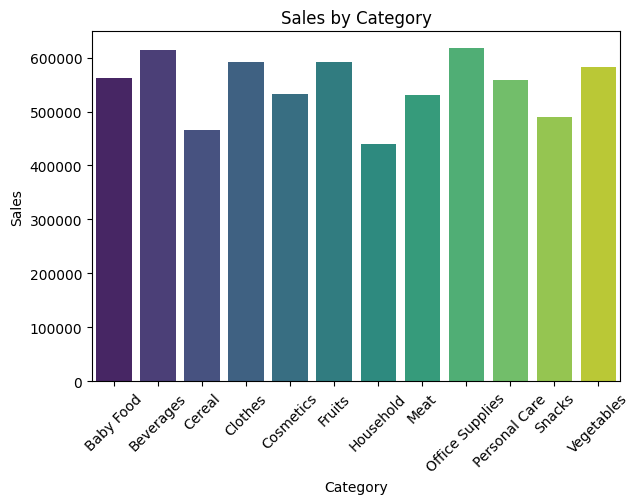

In [65]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.barplot(x="item_type", y="sales_by_category", data=df_category, palette="viridis")
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

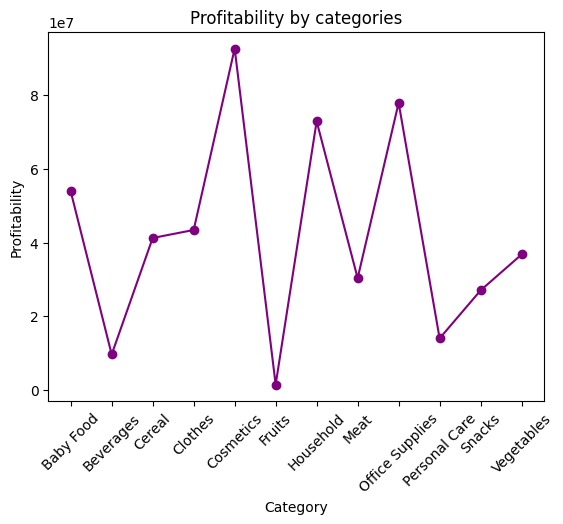

In [66]:
plt.plot(df_category["item_type"], df_category["profit_by_category"],color="purple", marker = "o")
plt.title("Profitability by categories")
plt.xlabel("Category")
plt.ylabel("Profitability")
plt.xticks(rotation=45)
plt.show()

Категорія Office Subblies має високу популярність та найбільші обсяги продажів (617,641 од.), відповідно генерує найбільший дохід (402,213,995.61 дол.), в той час як категорії Household та Cosmetics також займають значну частку ринку. Категорія Clothes має найвищий показник рентабельності (67.2%), це свідчить про значну частку прибутку від загального доходу по категорії. Meat категорія, має найменший показник рентабельності (13.6%), ймовірно через високі витрати по категорії.Категорія Fruits має найнижчий дохід (5,520,299.76 дол.) та прибуток (1,425,929.52 дол.), що свідчить про низьнкий попит або високу конкуренцію по цій категрої.

**по країнах :**

In [67]:
sales_by_country=df_basic.groupby('country')['units_sold'].sum().sort_values(ascending=False)
print(sales_by_country)

country
Other                     404853.0
Macedonia                 203078.0
San Marino                192228.0
Andorra                   185686.0
Greece                    176859.0
Malta                     173641.0
Serbia                    170369.0
Romania                   166882.0
Russia                    165954.0
Ukraine                   164577.0
Cyprus                    158743.0
Italy                     156781.0
Slovenia                  156479.0
Bosnia and Herzegovina    153545.0
Belarus                   153432.0
Hungary                   152242.0
Armenia                   150665.0
Latvia                    150525.0
Bulgaria                  150088.0
Austria                   145573.0
Switzerland               144320.0
Czech Republic            142446.0
Ireland                   140340.0
Norway                    138106.0
Montenegro                137200.0
France                    137043.0
Sweden                    132251.0
Slovakia                  131540.0
Spain       

In [68]:
revenue_by_country = (df_basic.assign(revenue=df_basic['units_sold'] * df_basic['unit_price']).groupby('country')['revenue'] .sum().sort_values(ascending=False))
print(revenue_by_country)

country
Other                     1.031456e+08
Czech Republic            5.354393e+07
Ukraine                   5.325232e+07
Bosnia and Herzegovina    5.011751e+07
Macedonia                 4.922209e+07
San Marino                4.788371e+07
Andorra                   4.775669e+07
Portugal                  4.717219e+07
Malta                     4.714532e+07
Russia                    4.605166e+07
Slovakia                  4.294100e+07
Hungary                   4.240825e+07
Serbia                    4.219354e+07
France                    3.936211e+07
Slovenia                  3.889253e+07
Latvia                    3.872208e+07
Greece                    3.869954e+07
Bulgaria                  3.816156e+07
Germany                   3.805509e+07
Armenia                   3.751984e+07
Italy                     3.587835e+07
Austria                   3.574087e+07
Sweden                    3.548213e+07
Romania                   3.428615e+07
Belarus                   3.423626e+07
Poland           

In [69]:
cost_by_country = (df_basic.assign(cost=df_basic['units_sold'] * df_basic['unit_cost']).groupby('country')['cost'] .sum().sort_values(ascending=False))
print(cost_by_country)

country
Other                     75420223.01
Czech Republic            39908338.36
Ukraine                   38447391.80
Bosnia and Herzegovina    36859905.72
Portugal                  35826782.25
Macedonia                 35537985.30
San Marino                34090715.67
Russia                    32783977.17
Malta                     32535192.93
Andorra                   32346656.54
Slovakia                  30888208.29
Serbia                    30340023.36
Hungary                   28622018.09
France                    28519766.49
Armenia                   28097487.03
Latvia                    27962798.86
Bulgaria                  27753213.09
Slovenia                  26769006.75
Germany                   26472168.46
Greece                    26375091.57
Austria                   25713361.85
Italy                     24964430.15
Sweden                    24326799.43
Romania                   23492602.16
Luxembourg                23204611.10
Ireland                   23191857.60
Pola

In [70]:
profit_by_country=(revenue_by_country-cost_by_country).sort_values(ascending=False)
print(profit_by_country)

country
Other                     27725423.94
Andorra                   15410036.63
Ukraine                   14804925.74
Malta                     14610127.88
San Marino                13792992.81
Hungary                   13786231.03
Macedonia                 13684099.95
Czech Republic            13635593.78
Russia                    13267682.64
Bosnia and Herzegovina    13257602.77
Greece                    12324450.13
Slovenia                  12123524.52
Slovakia                  12052790.03
Serbia                    11853514.38
Belarus                   11852421.05
Germany                   11582919.10
Portugal                  11345407.59
Montenegro                11169660.56
Sweden                    11155328.59
Switzerland               11037297.60
Italy                     10913921.97
France                    10842345.66
Romania                   10793548.69
Latvia                    10759285.29
Poland                    10671100.99
Albania                   10490706.02
Bulg

In [71]:
df_country = pd.DataFrame({
    "sales_by_country": sales_by_country,
    "revenue_by_country": revenue_by_country,
    "cost_by_country": cost_by_country,
    "profit_by_country": profit_by_country
}).reset_index()

In [72]:
df_country.head(10)

,country,sales_by_country,revenue_by_country,cost_by_country,profit_by_country
0,Albania,90608.0,32224853.87,21734147.85,10490706.02
1,Andorra,185686.0,47756693.17,32346656.54,15410036.63
2,Armenia,150665.0,37519840.21,28097487.03,9422353.18
3,Austria,145573.0,35740871.49,25713361.85,10027509.64
4,Belarus,153432.0,34236260.77,22383839.72,11852421.05
5,Belgium,120506.0,25852572.30,18376512.16,7476060.14
6,Bosnia and Herzegovina,153545.0,50117508.49,36859905.72,13257602.77
7,Bulgaria,150088.0,38161555.70,27753213.09,10408342.61
8,Croatia,73945.0,27119188.24,19800958.79,7318229.45
9,Cyprus,158743.0,33008851.50,22976630.94,10032220.56


In [73]:
top_10_countries_by_profit = profit_by_country.head(10)
print(top_10_countries_by_profit)

country
Other                     27725423.94
Andorra                   15410036.63
Ukraine                   14804925.74
Malta                     14610127.88
San Marino                13792992.81
Hungary                   13786231.03
Macedonia                 13684099.95
Czech Republic            13635593.78
Russia                    13267682.64
Bosnia and Herzegovina    13257602.77
dtype: float64


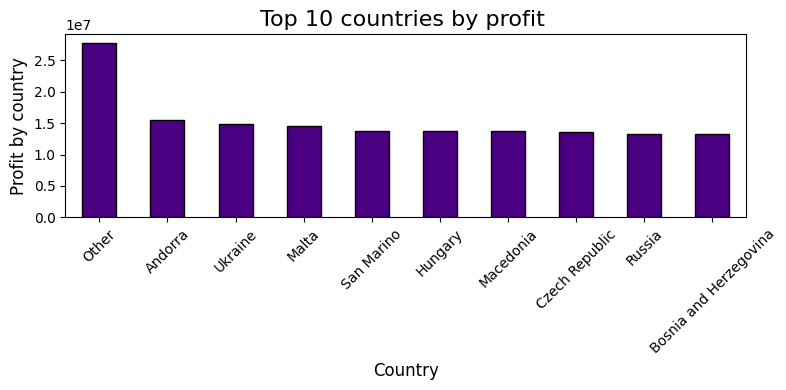

In [74]:
plt.figure(figsize=(8, 4))
top_10_countries_by_profit.plot(kind="bar", color="indigo", edgecolor="black")
plt.title("Top 10 countries by profit ", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Profit by country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Категорія "Other" має найбільшу загальну суму продажів 27,725,423.94$, що може свідчити про значний внесок нерозподілених регіонів або менш значущих ринків у загальну картину продажів, що потребує більш детального аналізу.До списку входить низка європейських країн, таких як Андорра (15,410,036.63), Україна (14,804,925.74), Мальта (14,610,127.88) та інші. Це вказує на високу купівельну активність у регіоні, що може бути пов’язано з економічною стабільністю або популярністю певних товарів.Такі невеликі держави, як Сан-Марино (13,792,992.81), Мальта (14,610,127.88) та Андорра (15,410,036.63), показують несподівано високі результати. Це може бути пов’язано зі спеціалізацією на високоякісних чи ексклюзивних продуктах, популярних серед місцевих мешканців і туристів.

**по регіонах :**

In [75]:
sales_by_region=df_basic.groupby('region')['units_sold'].sum().sort_values(ascending=False)
print(sales_by_region)

region
Europe    5761244.0
Asia       410427.0
Other      404853.0
Name: units_sold, dtype: float64


In [76]:
revenue_by_region = (df_basic.assign(revenue=df_basic['units_sold'] * df_basic['unit_price']).groupby('region')['revenue'] .sum().sort_values(ascending=False))
print(revenue_by_region)

region
Europe    1.505653e+09
Other     1.031456e+08
Asia      9.333089e+07
Name: revenue, dtype: float64


In [77]:
cost_by_region = (df_basic.assign(cost=df_basic['units_sold'] * df_basic['unit_cost']).groupby('region')['cost'] .sum().sort_values(ascending=False))
print(cost_by_region)

region
Europe    1.057096e+09
Other     7.542022e+07
Asia      6.817863e+07
Name: cost, dtype: float64


In [78]:
profit_by_region=(revenue_by_region-cost_by_region).sort_values(ascending=False)
print(profit_by_region)


region
Europe    4.485568e+08
Other     2.772542e+07
Asia      2.515225e+07
dtype: float64


In [79]:
df_region = pd.DataFrame({
    "sales_by_region": sales_by_region,
    "revenue_by_region": revenue_by_region,
    "cost_by_region": cost_by_region,
    "profit_by_region": profit_by_region
}).reset_index()

In [80]:
print(df_region)

   region  sales_by_region  revenue_by_region  cost_by_region  \
0    Asia         410427.0       9.333089e+07    6.817863e+07   
1  Europe        5761244.0       1.505653e+09    1.057096e+09   
2   Other         404853.0       1.031456e+08    7.542022e+07   

   profit_by_region  
0      2.515225e+07  
1      4.485568e+08  
2      2.772542e+07  


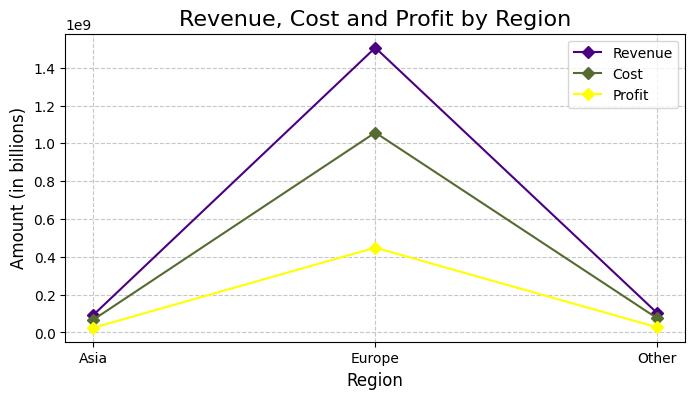

In [81]:
plt.figure(figsize=(8, 4))
plt.plot(df_region["region"], df_region["revenue_by_region"], marker='D', label='Revenue', color='indigo')
plt.plot(df_region["region"], df_region["cost_by_region"], marker='D', label='Cost', color='darkolivegreen')
plt.plot(df_region["region"], df_region["profit_by_region"], marker='D', label='Profit', color='yellow')
plt.title("Revenue, Cost and Profit by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Amount (in billions)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Проаналізувавши регіональну ефективність продажів можна зробити висновок, що безумовним лідером за всіма показниками, є країни Європи.Азія демонструє найгірші результати, що потребує аналізу причин низької популярності товарів та розробки стратегії для покращення ситуації. Можливо, варто переглянути асортимент товарів, цінову політику або маркетингові зусилля в цьому регіоні.Регіон "Інші" показує середні результати, але заслуговує на увагу через вищий дохід та прибуток порівняно з Азією при майже однаковій кількості продажів. Потрібно дослідити, які саме товари продаються краще в цьому регіоні, щоб використати цей досвід в інших регіонах.

##Аналіз інтервалу часу між замовленням та його відвантаженням  в розрізі:
категорій товарів;
країн;
регіонів.

In [82]:
_# Додаємо новий стовпець із тривалістю між замовленням і відвантаженням
df_basic['time_interval'] = ((df_basic['ship_date']) - pd.to_datetime(df_basic['order_date'])).dt.days

In [83]:
df_basic.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,country,region,sub_region,time_interval
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe,0
2,101025998,2014-07-18,2014-08-11,M,Other,7940,Online,4693.0,668.27,502.54,Household,Other,Other,Other,24
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe,31
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe,38


In [84]:
#середній час на відвантаження в розрізі категорій
avg_days_by_category = df_basic.groupby('item_type')['time_interval'].mean().sort_values()

<ipython-input-85-1946b900aa09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_days_by_category.index, y=avg_days_by_category.values, palette='viridis')


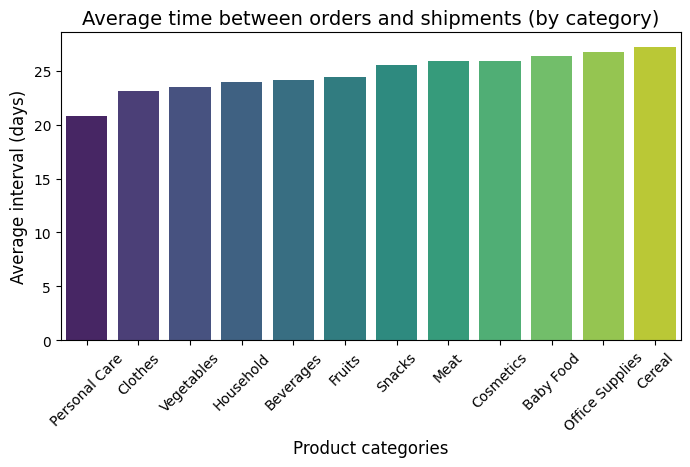

In [85]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_days_by_category.index, y=avg_days_by_category.values, palette='viridis')
plt.title('Average time between orders and shipments (by category)', fontsize=14)
plt.xlabel('Product categories', fontsize=12)
plt.ylabel('Average interval (days)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [86]:
#середній час на відвантаження в розрізі країн
avg_days_by_country = df_basic.groupby('country')['time_interval'].mean().sort_values()

In [87]:
#оскільки країн багато, відобразимо на графіку топ 10 з найбільшим часом на відвантаження
top_10_countries = avg_days_by_country.tail(10)

<ipython-input-88-58947bf640f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


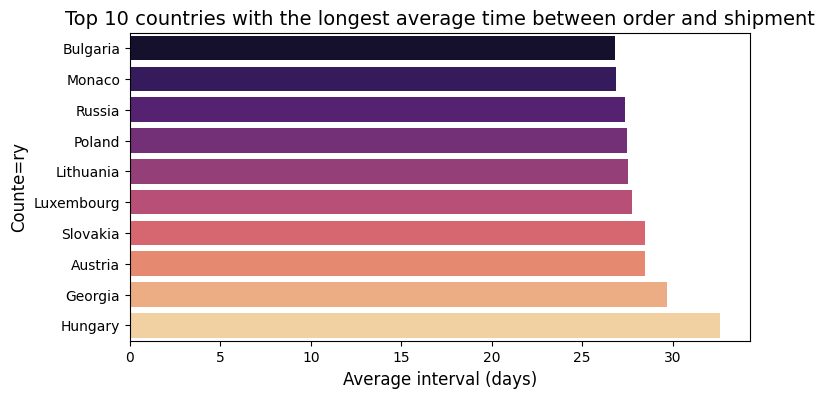

In [88]:
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')
plt.title('Top 10 countries with the longest average time between order and shipment', fontsize=14)
plt.xlabel('Average interval (days)', fontsize=12)
plt.ylabel('Counte=ry', fontsize=12)
plt.show()

In [89]:
#відобразимо на графіку топ 10 з найменншим часом на відвантаження
top_10_countries_min = avg_days_by_country.head(10)

<ipython-input-90-e9f1b0e17ed4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries_min.values, y=top_10_countries_min.index, palette='viridis')


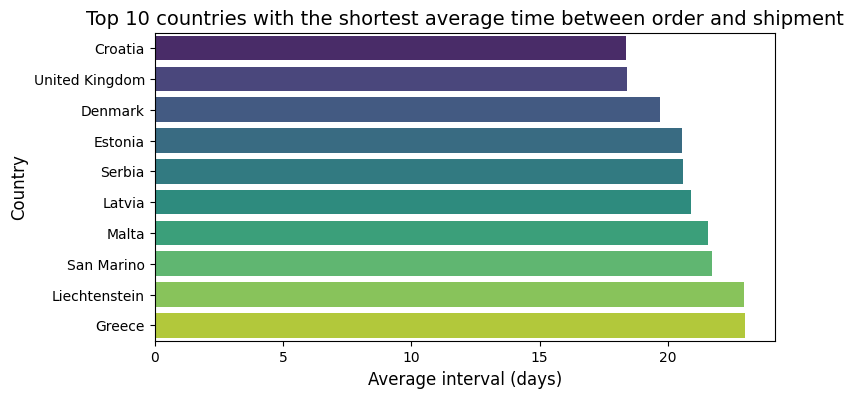

In [90]:
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_countries_min.values, y=top_10_countries_min.index, palette='viridis')
plt.title('Top 10 countries with the shortest average time between order and shipment', fontsize=14)
plt.xlabel('Average interval (days)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [91]:
#середній час на відвантаження в розрізі регіонів
avg_days_by_region = df_basic.groupby('region')['time_interval'].mean().sort_values()

<ipython-input-92-d938554d7bd6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_days_by_region.index, y=avg_days_by_region.values, palette='coolwarm')


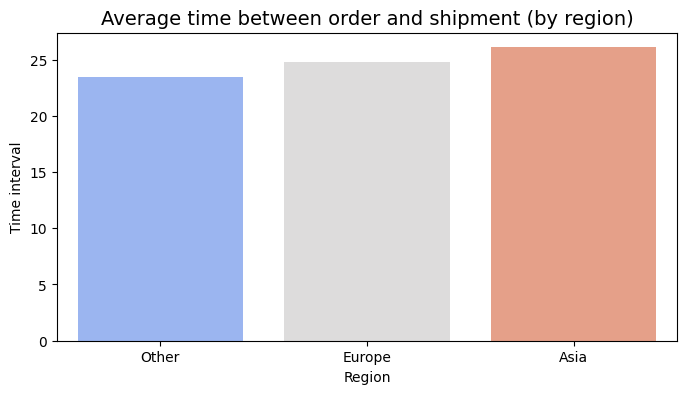

In [92]:
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_days_by_region.index, y=avg_days_by_region.values, palette='coolwarm')
plt.title('Average time between order and shipment (by region)', fontsize=14)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Time interval', fontsize=10)
plt.show()




##Аналіз залежності прибуток від часу, необхідного на відвантаження товару

In [93]:
#розрахуємо прибуток
df_basic['profit'] = (df_basic['units_sold'] * df_basic['unit_price'])-(df_basic['units_sold']-df_basic['unit_cost'])

In [94]:
profit_by_days = (df_basic.groupby('time_interval')['profit'].mean().reset_index().sort_values('time_interval'))#групування за середнів часом відвантаження, та середнім прибутком

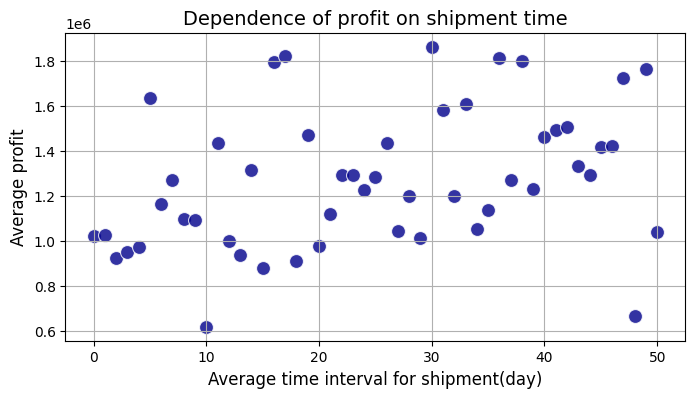

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.scatterplot(data=profit_by_days,x='time_interval',y='profit',color='darkblue',s=100,alpha=0.8)
plt.title('Dependence of profit on shipment time', fontsize=14)
plt.xlabel('Average time interval for shipment(day)', fontsize=12)
plt.ylabel('Average profit', fontsize=12)
plt.grid(True)
plt.show()

З огляду графіку не простежується чітка лінійна залежність між часом доставки та прибутком. Точки розкидані хаотично, і немає вираженого тренду зростання або спадання прибутку зі збільшенням часу доставки, тому можемо зробити висновок висновок, що час доставки, не є основним фактором, що впливає на прибуток.

##Аналіз динаміки продажів (у часі) у розрізі категорій товарів, країн, регіонів
НЕОБХІДНО ДОПРАЦЮВАТИ, НЕ МОЖУ ЗРОЗУМІТИ ЯК СФОМУВАТИ ДАНІ, ШОБ ВІДОБРАЗИТИ НА ГРАФІКАХ, КАТЕГОРІ 12 А КРАЇН ЩЕ БІЛЬШЕ, ЯК ЇХ ВІДОБРАЗИТИ???


In [96]:
df_basic['revenue'] = df_basic['units_sold'] * df_basic['unit_price']#загальний обсягу продажів-дохід

In [97]:
df_basic['year_month'] = pd.to_datetime(df_basic['order_date']).dt.to_period('M')#дату в формат рік/місяць

 динаміка продажів у часі в розрізі категорій:

In [98]:
sales_by_category = (df_basic.groupby(['year_month', 'item_type'])['revenue'].sum().reset_index())#групування за категорія

##Aналіз продажів товарів за днями тижня:


In [99]:
df_basic['day_of_week'] = pd.to_datetime(df_basic['order_date']).dt.day_name()#дент тиждня

In [100]:
sales_by_day = (df_basic.groupby('day_of_week')['units_sold'].sum().reset_index())

In [101]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=day_order, ordered=True)
profit_by_day = sales_by_day.sort_values('day_of_week')

<ipython-input-102-44059ea8c16b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_day,x='day_of_week', y='units_sold',palette='viridis')


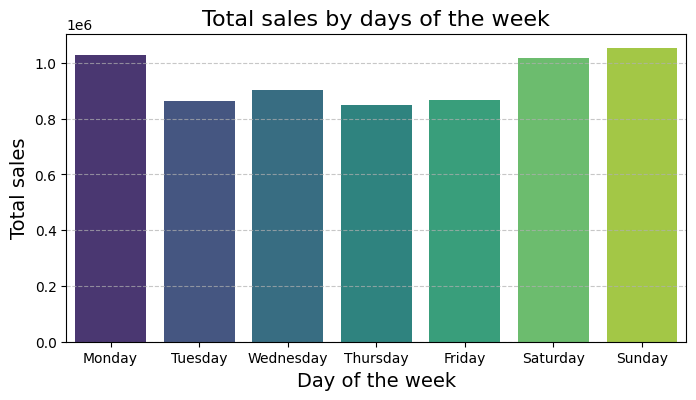

In [102]:
plt.figure(figsize=(8, 4))
sns.barplot(data=profit_by_day,x='day_of_week', y='units_sold',palette='viridis')
plt.title('Total sales by days of the week', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Total sales', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Найбільші обсяги продажів спостерігаються у неділю, суботу та понеділок, що свідчить про активність покупців у вихідні та на початку тижня.Отже, вихідні дні є найбільш продуктивними для продажів, що вказує на доцільність фокусування маркетингових зусиль саме на ці дні для максимізації прибутку.

In [103]:
df_basic['profit'] = (df_basic['units_sold'] * df_basic['unit_price']) - (df_basic['units_sold'] * df_basic['unit_cost'])

In [104]:
profit_by_day = (df_basic.groupby('day_of_week')['profit'].sum().reset_index())

In [105]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
profit_by_day['day_of_week'] = pd.Categorical(profit_by_day['day_of_week'], categories=day_order, ordered=True)
profit_by_day = profit_by_day.sort_values('day_of_week')

<ipython-input-106-70f033ab181e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_day,y='day_of_week', x='profit',palette='viridis')


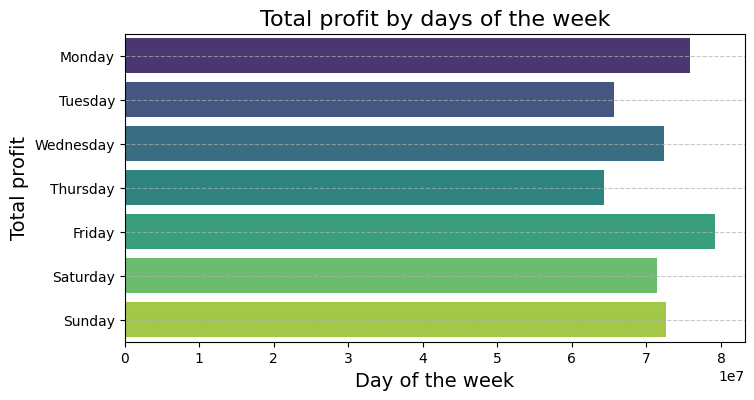

In [106]:
plt.figure(figsize=(8, 4))
sns.barplot(data=profit_by_day,y='day_of_week', x='profit',palette='viridis')
plt.title('Total profit by days of the week', fontsize=16)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Total profit', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Найбільший прибуток зафіксовано у п'ятницю та понеділок, тоді як найнижчий прибуток спостерігається у четвер. Загалом, більшість днів демонструють стабільно високий рівень прибутку, але з незначними коливаннями.

In [107]:
#щоб проаналізувати сезонність додамо колонку з місяцем і оцінемо кількість проданиз товарів по місяцях
df_basic['month'] = pd.to_datetime(df_basic['order_date']).dt.month_name()

In [108]:
sales_by_month = (df_basic.groupby('month')['units_sold'].sum().reset_index())

In [109]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)
sales_by_month = sales_by_month.sort_values('month')

<ipython-input-110-36d14ac7022d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_month,x='month',y='units_sold',palette='coolwarm')


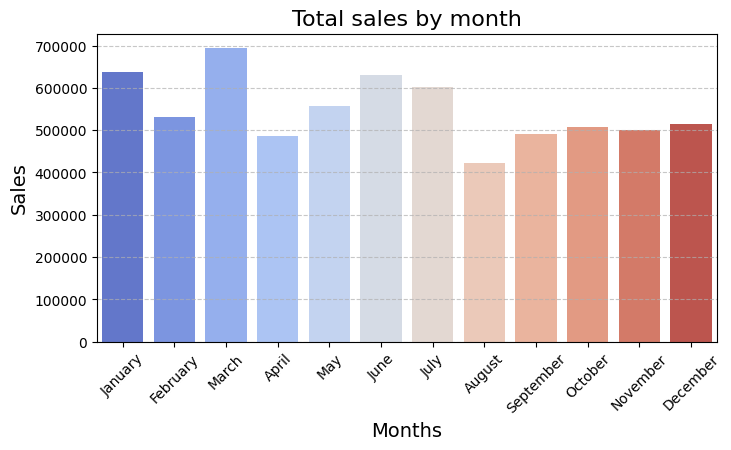

In [110]:
plt.figure(figsize=(8, 4))
sns.barplot(data=sales_by_month,x='month',y='units_sold',palette='coolwarm')
plt.title('Total sales by month', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Найбільші обсяги продажів спостерігаються в березні, червні та липні. Це свідчить про пікові періоди попиту на товари, що відображені на графіку.Найменші обсяги продажів припадають на лютий, серпень та квітень. Це вказує на періоди спаду попиту.З отриманих результатім можна припустити, що в загальній кількості проданих одиниць товарів спостерігається певна сезонність по місяцях.
